<h1>Pymaceuticals</h1>
</hr>
<h2>Overall Analysis</h2>
<ol><li>Capomulin had the highest rate of mouse survial</li>
<li>Capomulin was the only treatment observed to show a reduction in tumor size; other treatments showed results similar to placebo</li>
<li>It is not clear whether any treatment had a statistically significant reduction in metastatic spread. A t-test comparing treatments vs. placebo would likely be needed to make a conclusion on that.</li></ol>


In [1]:
#import dependencies

%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #switching on seaborn defaults to make the graph look pretty

In [2]:
#import our two csv files
drug_path = os.path.join('mouse_drug_data.csv')
trial_path = os.path.join('clinicaltrial_data.csv')
drug_df = pd.read_csv(drug_path)
trial_df = pd.read_csv(trial_path)

In [3]:
#inspect the files
trial_df.dtypes
trial_df.count()
trial_df.head()
trial_df.Timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [4]:
drug_df.dtypes
drug_df.count()
drug_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
#merge the two dataframes
df = pd.merge(trial_df, drug_df, how='inner')
df.count()
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


<h3>Scatter Plot of tumor response to treatment</h3>

In [6]:
#Creat a scatter plot of tumor volume changing over time with each treatment
#we will need to group by treatment, and then take the mean of each tumor value per timepoint for each treatment and plot that.

drug_groups = df.groupby(['Drug', 'Timepoint'])
drug_groups_df = pd.DataFrame({'Tumor Volume': drug_groups['Tumor Volume (mm3)'].mean()})
drug_groups_df = drug_groups_df.sort_index()
drug_groups_df.head()


Tumor Volume
Drug      Timepoint              
Capomulin 0             45.000000
          5             44.266086
          10            43.084291
          15            42.064317
          20            40.716325

In [7]:
#turn each drug group into a series to be able to plot. Timepoints should be the index to this dataframe
#Can we use .loc to grab only the results from a specific drug?

cap = drug_groups_df.loc['Capomulin', :]
cap

#get a list of all the drugs
#drugs = df.groupby('Drug')
#drug_list_df = pd.DataFrame({'Tumor Volume': drugs['Tumor Volume (mm3)'].mean()})
drugs = df.Drug.unique()
drug_list = sorted(drugs)
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [8]:
#find SEM for both tumor volume and # of metastatic sites

tumor_sem = drug_groups['Tumor Volume (mm3)'].sem()
tumor_sem = pd.DataFrame(tumor_sem)
meta_sem = drug_groups['Metastatic Sites'].sem()
meta_sem = pd.DataFrame(meta_sem)
test = meta_sem['Metastatic Sites'].loc['Capomulin',:]
test

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
           25           0.181818
           30           0.172944
           35           0.169496
           40           0.175610
           45           0.202591
Name: Metastatic Sites, dtype: float64

In [9]:
#get sem for one drug (to test and see if we can use later)  
    
capomulin_t_sem = tumor_sem['Tumor Volume (mm3)'].loc['Capomulin',:]  
capomulin_t_sem

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#create a timepoint index to be used for a later dataframe
cap = drug_groups_df.loc['Capomulin', :]
cap = pd.DataFrame(cap)
cap

,Tumor Volume
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


In [111]:
#create a new dataframe with our drug names as column names
df_by_drug = pd.DataFrame(index=cap.index)
    
for drug in drug_list:
    df_by_drug[drug] = drug_groups_df.loc[drug, :]
    
df_by_drug.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0,0.5,'Tumor Volume (mm3) - error = SEM')

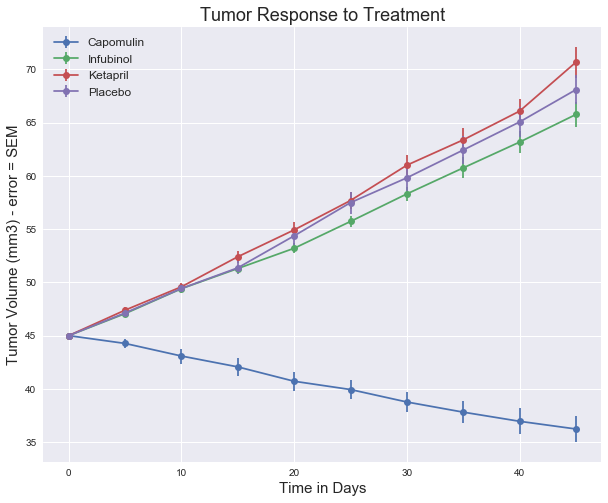

In [114]:
plt.figure(figsize=(10,8))
plt.errorbar(x=df_by_drug.index, y=df_by_drug.Capomulin, yerr=capomulin_t_sem, marker='o')
plt.errorbar(x=df_by_drug.index, y=df_by_drug.Infubinol, yerr=tumor_sem['Tumor Volume (mm3)'].loc['Infubinol',:] , marker='o')
plt.errorbar(x=df_by_drug.index, y=df_by_drug.Ketapril, yerr=tumor_sem['Tumor Volume (mm3)'].loc['Ketapril',:] , marker='o')
plt.errorbar(x=df_by_drug.index, y=df_by_drug.Placebo, yerr=tumor_sem['Tumor Volume (mm3)'].loc['Placebo',:] , marker='o')
plt.legend(prop={'size': 12})
plt.title('Tumor Response to Treatment', fontsize=18)
plt.xlabel('Time in Days', fontsize=15)
plt.ylabel('Tumor Volume (mm3) - error = SEM', fontsize=15)

<h3>Scatter Plot of metastatic response to treatment</h3>

In [13]:
#repeat the process of the dataframe but for metastatic response

meta_df = df.groupby(['Drug', 'Timepoint'])
meta_df = pd.DataFrame({'Metastatic Sites': drug_groups['Metastatic Sites'].mean()})
meta_df = meta_df.sort_index()

In [14]:
metastatic_df = pd.DataFrame(index=cap.index)
    
for drug in drug_list:
    metastatic_df[drug] = meta_df.loc[drug, :]
    
metastatic_df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Text(0,0.5,'Metastatic Sites - error = SEM')

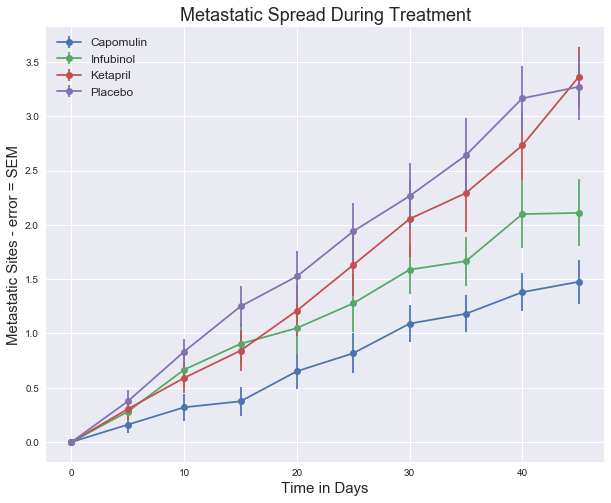

In [109]:
plt.figure(figsize=(10,8))
plt.errorbar(x=metastatic_df.index, y=metastatic_df.Capomulin, yerr=meta_sem['Metastatic Sites'].loc['Capomulin',:] , marker='o')
plt.errorbar(x=metastatic_df.index, y=metastatic_df.Infubinol, yerr=meta_sem['Metastatic Sites'].loc['Infubinol',:] , marker='o')
plt.errorbar(x=metastatic_df.index, y=metastatic_df.Ketapril, yerr=meta_sem['Metastatic Sites'].loc['Ketapril',:] , marker='o')
plt.errorbar(x=metastatic_df.index, y=metastatic_df.Placebo, yerr=meta_sem['Metastatic Sites'].loc['Placebo',:] , marker='o')
plt.legend(prop={'size': 12})
plt.title('Metastatic Spread During Treatment', fontsize=18)
plt.xlabel('Time in Days', fontsize=15)
plt.ylabel('Metastatic Sites - error = SEM', fontsize=15)

<h3>Scatter plot of Survival Rate (mice alive through treatment)</h3>

In [16]:
#we want a count of mice per treatment at different timepoints
#group by treatment and timepoint, and then get a count of mice

mice = pd.DataFrame({'Living Mice': drug_groups['Mouse ID'].count()})
mice.head()

Living Mice
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [17]:
#pivot the df

mice_df = pd.DataFrame(index=cap.index)
    
for drug in drug_list:
    mice_df[drug] = mice.loc[drug, :]
    
mice_df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


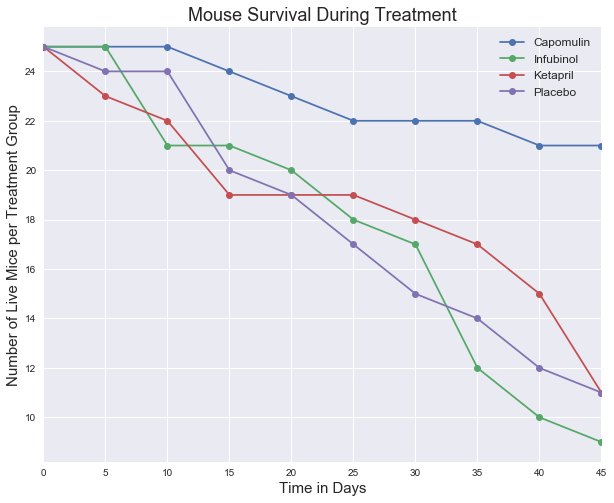

In [110]:
select_mice = mice_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
select_mice.plot(figsize=(10,8), marker='o')
plt.title('Mouse Survival During Treatment', fontsize=18)
plt.xlabel('Time in Days', fontsize=15)
plt.ylabel('Number of Live Mice per Treatment Group', fontsize=15)
plt.legend(prop={'size': 12})

<h3>Create a summary bar graph of % tumor volume change for target drugs</h3>

In [19]:
#also make sure to include a label on each bar with the perent change

#first, calculate %change in tumor size for each treatment

percent = pd.DataFrame((df_by_drug.iloc[9,:] / df_by_drug.iloc[0,:]) *100 - 100)

,0
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


In [25]:
percent_df = pd.DataFrame({
    'Capomulin': percent.iloc[0], 
    'Infubinol': percent.iloc[2], 
    'Ketapril': percent.iloc[3], 
    'Placebo': percent.iloc[5]})
percent_df

,Capomulin,Infubinol,Ketapril,Placebo
0,-19.475303,46.123472,57.028795,51.29796


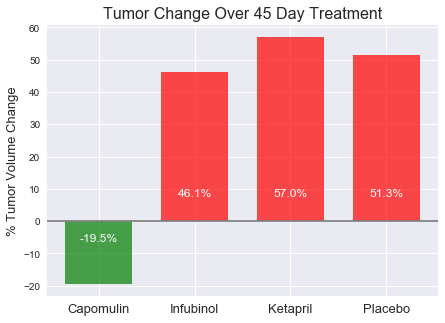

In [101]:
x=np.arange(0,4)
y=percent_df.iloc[0]
tick_locations=np.arange(0,4)
treatments=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
my_color=np.where(y>=0, 'red', 'green')

#plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(7,5))
rects = ax.bar(x, y, 0.7, color=my_color, alpha=0.7)

ax.set_xticks(tick_locations)
ax.set_xticklabels(treatments, fontsize=13)
ax.set_ylabel('% Tumor Volume Change', fontsize=13)
ax.set_title('Tumor Change Over 45 Day Treatment', fontsize=16)
ax.axhline(y=0, color='grey')

labels = percent_df.iloc[0].round(1).map("{:,.1f}%".format)

for rect, label in zip(rects, labels):
    if rect.get_height() > 0: 
        height = 7
    else: 
        height = -7
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom', color='white')

#ax.text(percent_df.iloc[0], y=0, s=1)
 
plt.show()